In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


<br>
<br>
<h2 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:10px;text-align:center; font-weight: bold" >Credit Card Fraud Detection</h2> 
<br> 
<br>
<div class = 'image'> <img style="float:center; border:10px solid #fed049; width:90%" align=center src = https://res.cloudinary.com/dofgyxd4y/image/upload/v1623419916/screen-shot-2018-05-03-at-3-51-26-pm_psz4a9.png> 
</div>
<br>
<br>
<a href ="https://res.cloudinary.com/dofgyxd4y/image/upload/v1623419916/screen-shot-2018-05-03-at-3-51-26-pm_psz4a9.png" style = "font-size:20px,color: dimgrey, text-align:left,font-family:serif"></a>
<br>


In [2]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
pd.pandas.set_option("display.max_columns",None)
print("all necessary libraries are imported")

all necessary libraries are imported


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >1. Load The Dataset</h2> 

In [3]:
train=pd.read_csv("../input/creditcardfraud/creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
train.shape

(284807, 31)

In [5]:
train.isnull().values.any()

False

In [6]:
train.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >1. Visualizing The Target feature</h2> 

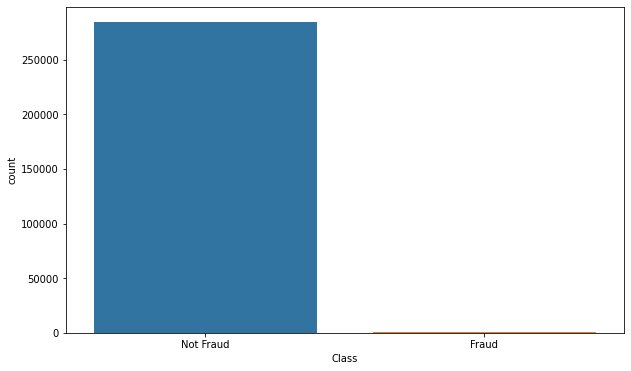

In [7]:
plt.figure(figsize=(10,6))
g = sns.countplot(train['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>This plot shows it is highly unbalanced as most of the features are non_fraud </strong></p>

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >2. Visualizing The Amount feature</h2> 

<AxesSubplot:xlabel='Amount', ylabel='Count'>

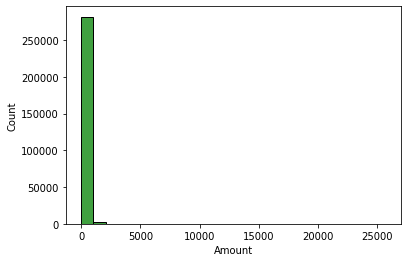

In [8]:
sns.histplot(train['Amount'],bins=25,color="green")

<AxesSubplot:xlabel='log_Amount', ylabel='Count'>

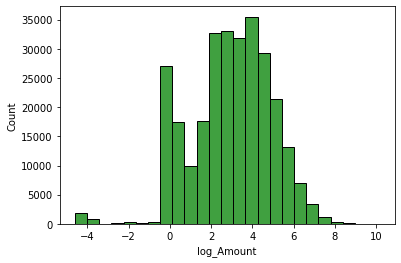

In [9]:
train['log_Amount'] = train['Amount'].apply(lambda x: np.log(x + 0.01))
sns.histplot(train['log_Amount'],bins=25,color="green")

<AxesSubplot:xlabel='Time', ylabel='Count'>

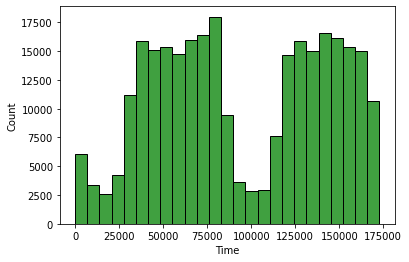

In [10]:
sns.histplot(train['Time'],bins=25,color="green")

<AxesSubplot:xlabel='log_Time', ylabel='Count'>

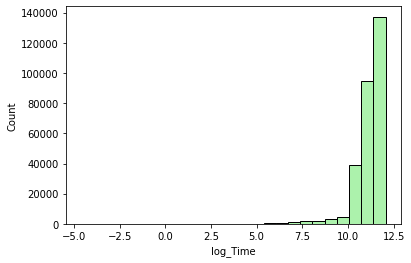

In [11]:
train['log_Time'] = train['Time'].apply(lambda x: np.log(x + 0.01))
sns.histplot(train['log_Time'],bins=25,color="lightgreen")

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >3. Visualizing The Outliers in amount feature</h2> 

Text(0, 0.5, 'log_Amount')

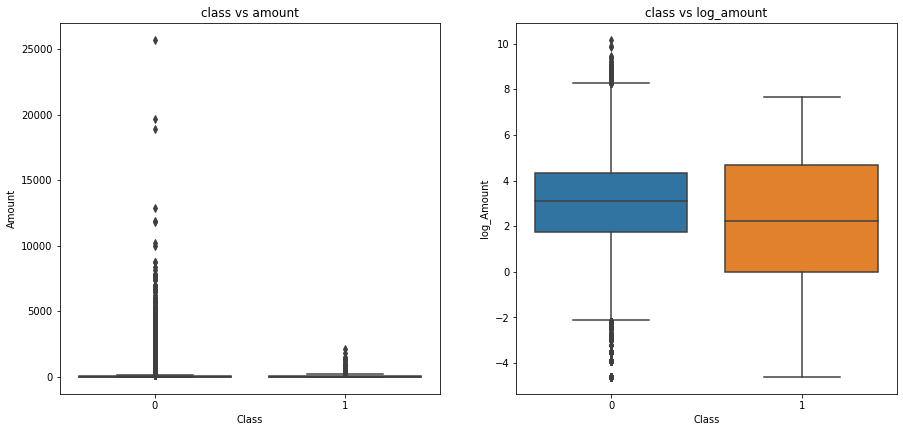

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(221)
ax1=sns.boxplot(x=train['Class'],y=train['Amount'],data=train)
ax1.set_title("class vs amount")
ax1.set_xlabel("Class")
ax1.set_ylabel("Amount")

plt.subplot(222)
ax1=sns.boxplot(x=train['Class'],y=train['log_Amount'],data=train)
ax1.set_title("class vs log_amount")
ax1.set_xlabel("Class")
ax1.set_ylabel("log_Amount")


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >4. Scaling the data</h2> 

<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>As Robust scalers are less prone to outliers Hence i used it here for scaling the features</strong></p>

In [13]:
# robust scaler
scaler=RobustScaler()
train['scaled_Amount']=scaler.fit_transform(train['log_Amount'].values.reshape(-1, 1))
train['scaled_time']=scaler.fit_transform(train['Time'].values.reshape(-1, 1))

<AxesSubplot:xlabel='scaled_Amount', ylabel='Count'>

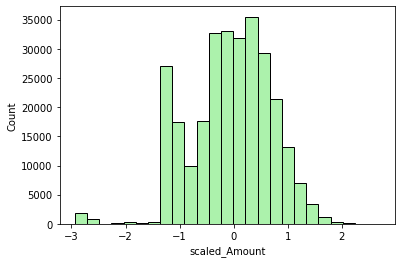

In [14]:
sns.histplot(train['scaled_Amount'],bins=25,color="lightgreen")

<AxesSubplot:xlabel='scaled_time', ylabel='Count'>

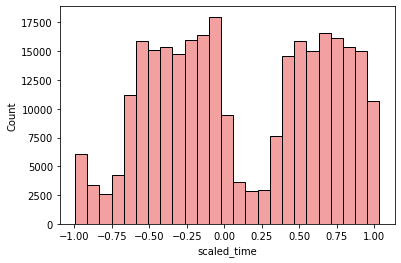

In [15]:
sns.histplot(train['scaled_time'],bins=25,color="lightcoral")

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >5. Preparing the Dataset for analysis</h2> 

In [16]:
class_count_0, class_count_1 = train['Class'].value_counts()
class_0 = train[train['Class'] == 0]
class_1 = train[train['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 35)
class 1: (492, 35)


In [17]:
fraud_df=train[train['Class']==1]
non_fraud_df=train[train['Class']==0]
fraud_df.shape, non_fraud_df.shape

((492, 35), (284315, 35))

In [18]:
train.drop(['Time','Amount','log_Amount','log_Time'], axis=1, inplace=True)

In [19]:
scaled_amount = train['scaled_Amount']
scaled_time = train['scaled_time']

train.drop(['scaled_Amount', 'scaled_time'], axis=1, inplace=True)
train.insert(0, 'scaled_Amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

train.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.731127,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.800391,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.085310,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.657947,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.441346,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >5. Heatmap</h2> 

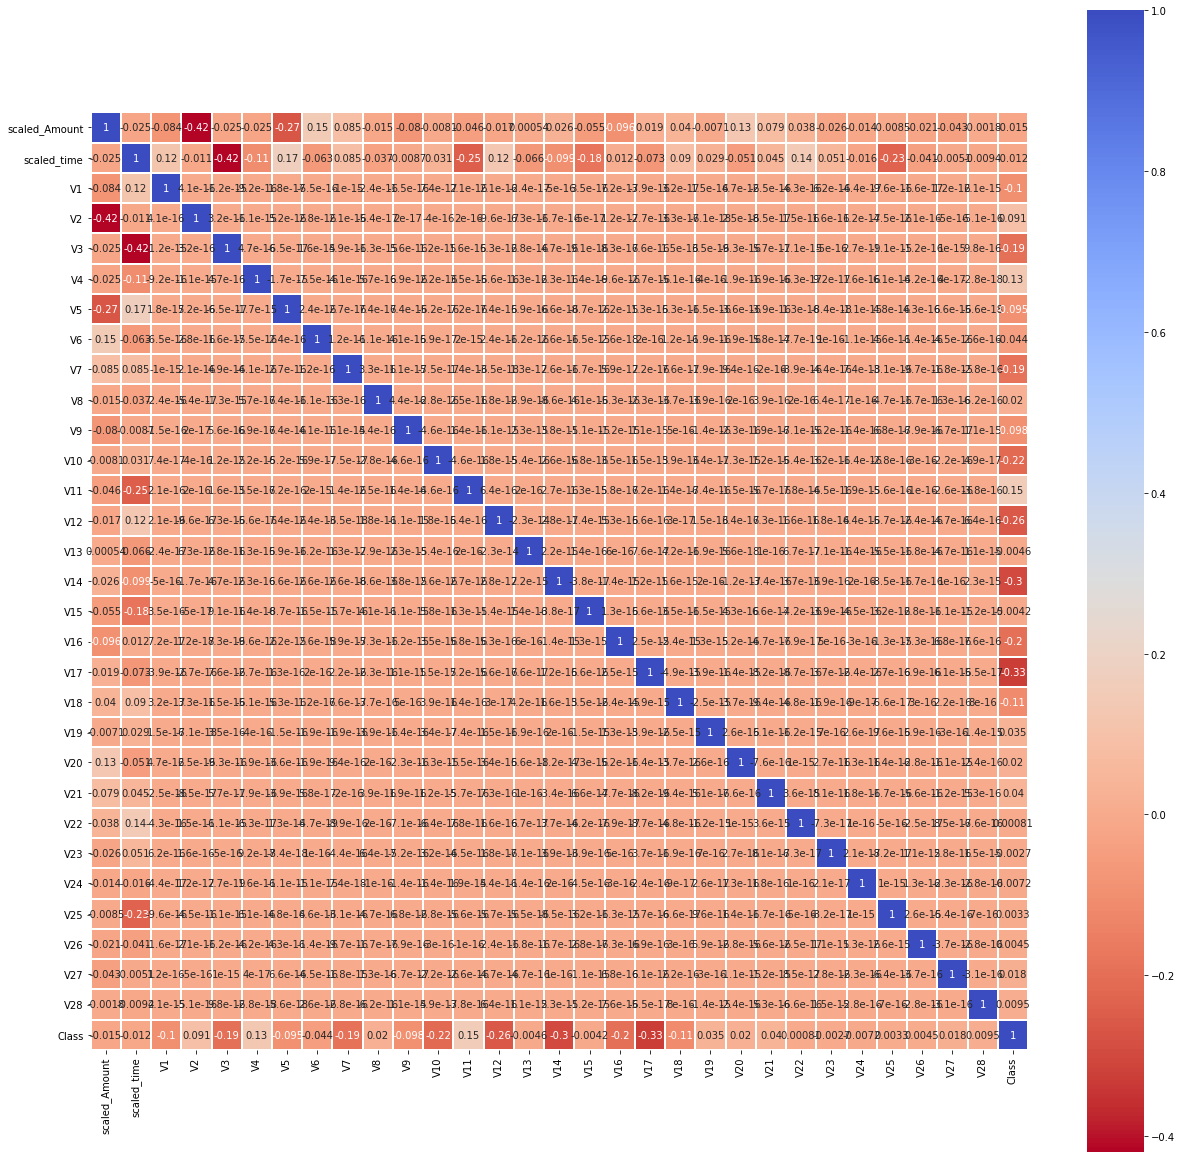

In [20]:
colormap = 'coolwarm_r'

plt.figure(figsize=(21,21))

sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()


<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>This shows:
Negatively Correlated= V3,V7,V10,V12,V14,V17 and Positively Correlated= V2,V4,V11,V19 Features</strong>
  

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >5.Ways Of handling Unbalanced Datset</h2> 

In [21]:
y=train['Class']
train.drop(['Class'],axis=1,inplace=True)

In [22]:
# train test split of the dataset
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >6. Random Over sampler</h2> 

In [23]:
# random over sampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 3px 3px; padding:2px;text-align:center; font-weight: bold" >Visualize The change</h2> 

<AxesSubplot:xlabel='Class', ylabel='count'>

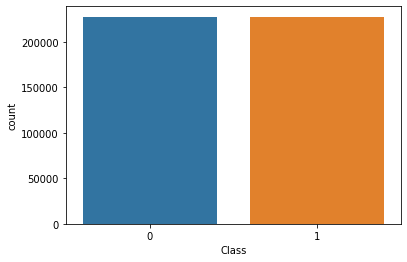

In [24]:
sns.countplot(y_ros)

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >7. Random Under sampler</h2> 

In [25]:
# Random under sampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)

# fit predictor and target variable
x_rus, y_rus = ros.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 394, 1: 394})


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 3px 3px; padding:2px;text-align:center; font-weight: bold" >Visualize The change</h2> 

<AxesSubplot:xlabel='Class', ylabel='count'>

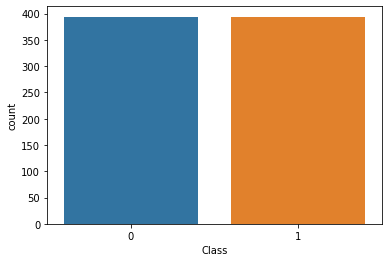

In [26]:
sns.countplot(y_rus)

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >8. Cluster Based Over Sampling</h2> 
This approach to addressing imbalanced data uses K-mean clustering. The clustering algorithm is applied to both the majority class and the minority class in which each class is oversampled, such that each class has the same number of data elements. Though this is an efficient method, it suffers from the issue of overfitting.

In [27]:
pip install cluster-over-sampling

Note: you may need to restart the kernel to use updated packages.


In [28]:
import imblearn

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler
smote = SMOTE(random_state=42)
kmeans = KMeans(n_clusters=50, random_state=42)
kmeans_smote = ClusterOverSampler(oversampler=smote, clusterer=kmeans)

# Fit and resample imbalanced data
x_cos, y_cos = kmeans_smote.fit_resample(x_train, y_train)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_cos))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 3px 3px; padding:2px;text-align:center; font-weight: bold" >Visualize The change</h2> 

<AxesSubplot:xlabel='Class', ylabel='count'>

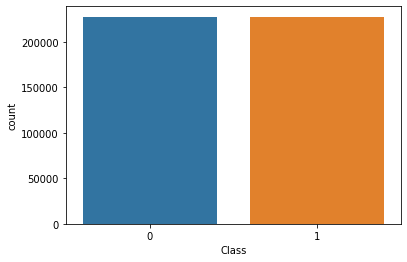

In [30]:
sns.countplot(y_cos)

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >9. SMOTE</h2> 

In [31]:
# smote
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_smote))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 3px 3px; padding:2px;text-align:center; font-weight: bold" >Visualize The change</h2> 

<AxesSubplot:xlabel='Class', ylabel='count'>

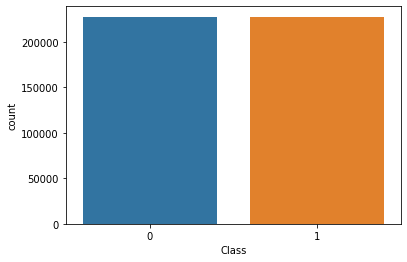

In [32]:
sns.countplot(y_smote)

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >10.Near Miss</h2> 

In [33]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape: Counter({0: 394, 1: 394})


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 3px 3px; padding:2px;text-align:center; font-weight: bold" >Visualize The change</h2> 

<AxesSubplot:xlabel='Class', ylabel='count'>

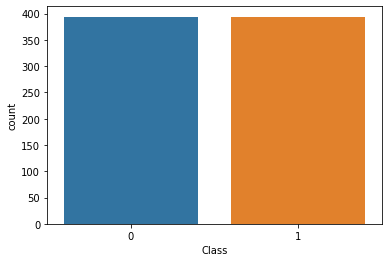

In [34]:
sns.countplot(y_nm)

<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >11.Model Building</h2> 

<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>model building
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>best models used for binary clssification
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>1.logistic regression Logistic Regression
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>2.k-Nearest Neighbors
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>3.Decision Trees
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>4.Support Vector Machine
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>5.Naive Bayes
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>6.Bagging Decision Tree (Ensemble Learning I)
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>7.Boosted Decision Tree (Ensemble Learning II)
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>8. Random Forest (Ensemble Learning III)


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Logistic Regression With SMOTE</h2> 

In [35]:
# with smote
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_1=LogisticRegression()
model_1.fit(x_smote,y_smote)
pred_1=model_1.predict(x_test)
acc_1 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_1}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9748955443980197
Confusion Matrix : 
[[55442  1422]
 [    8    90]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [36]:
# cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
model_1=LogisticRegressionCV(cv=10, random_state=0)
model_1.fit(x_smote,y_smote)
pred_1=model_1.predict(x_test)
acc_1 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_1}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9748955443980197
Confusion Matrix : 
[[55442  1422]
 [    8    90]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Logistic Regression With Near Miss</h2> 

In [37]:
# near miss
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_2=LogisticRegression()
model_2.fit(x_nm,y_nm)
pred_2=model_2.predict(x_test)
acc_2 = accuracy_score(y_test, pred_2)
con_mat = confusion_matrix(y_test, pred_2)
clf_report = classification_report(y_test, pred_2)
print(f"Accuracy Score of Logistic Regression : {acc_2}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.5572662476738879
Confusion Matrix : 
[[31651 25213]
 [    6    92]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     56864
           1       0.00      0.94      0.01        98

    accuracy                           0.56     56962
   macro avg       0.50      0.75      0.36     56962
weighted avg       1.00      0.56      0.71     56962



In [38]:
# cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
model_2=LogisticRegressionCV(cv=5, random_state=1,max_iter=1000)
model_2.fit(x_nm,y_nm)
pred_2=model_1.predict(x_test)
acc_2 = accuracy_score(y_test, pred_2)
con_mat = confusion_matrix(y_test, pred_2)
clf_report = classification_report(y_test, pred_2)
print(f"Accuracy Score of Logistic Regression : {acc_2}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9748955443980197
Confusion Matrix : 
[[55442  1422]
 [    8    90]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Logistic Regression With ClusterOverSampler</h2> 

In [39]:
# cluster based sampling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_3=LogisticRegression()
model_3.fit(x_cos,y_cos)
pred_3=model_3.predict(x_test)
acc_3 = accuracy_score(y_test, pred_3)
con_mat = confusion_matrix(y_test, pred_3)
clf_report = classification_report(y_test, pred_3)
print(f"Accuracy Score of Logistic Regression : {acc_3}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9991573329588147
Confusion Matrix : 
[[56849    15]
 [   33    65]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.66      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
# cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_3=LogisticRegressionCV(cv=5,random_state=0)
model_3.fit(x_cos,y_cos)
pred_3=model_3.predict(x_test)
acc_3 = accuracy_score(y_test, pred_3)
con_mat = confusion_matrix(y_test, pred_3)
clf_report = classification_report(y_test, pred_3)
print(f"Accuracy Score of Logistic Regression : {acc_3}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9991573329588147
Confusion Matrix : 
[[56849    15]
 [   33    65]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.66      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Decision Tree Classifier with SMOTE</h2> 

In [41]:
# decision Tree Classifier
model_4=DecisionTreeClassifier()
model_4.fit(x_smote,y_smote)
pred_4=model_4.predict(x_test)
acc_4 = accuracy_score(y_test, pred_4)
con_mat = confusion_matrix(y_test, pred_4)
clf_report = classification_report(y_test, pred_4)
print(f"Accuracy Score of Decision Tree : {acc_4}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.9979811102138267
Confusion Matrix : 
[[56767    97]
 [   18    80]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.82      0.58        98

    accuracy                           1.00     56962
   macro avg       0.73      0.91      0.79     56962
weighted avg       1.00      1.00      1.00     56962



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; 
color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Decision Tree With Near Miss</h2> 

In [42]:
# decision Tree Classifier
model_5=DecisionTreeClassifier()
model_5.fit(x_nm,y_nm)
pred_5=model_5.predict(x_test)
acc_5 = accuracy_score(y_test, pred_5)
con_mat = confusion_matrix(y_test, pred_5)
clf_report = classification_report(y_test, pred_5)
print(f"Accuracy Score of Decision Tree : {acc_5}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.19858853270601454
Confusion Matrix : 
[[11215 45649]
 [    1    97]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.20      0.33     56864
           1       0.00      0.99      0.00        98

    accuracy                           0.20     56962
   macro avg       0.50      0.59      0.17     56962
weighted avg       1.00      0.20      0.33     56962



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:lightgreen ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Decision Tree With ClusterOverSampler</h2> 

In [43]:
# decision Tree Classifier
model_6=DecisionTreeClassifier()
model_6.fit(x_cos,y_cos)
pred_6=model_6.predict(x_test)
acc_6 = accuracy_score(y_test, pred_6)
con_mat = confusion_matrix(y_test, pred_6)
clf_report = classification_report(y_test, pred_6)
print(f"Accuracy Score of Decision Tree : {acc_6}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.9991397773954567
Confusion Matrix : 
[[56840    24]
 [   25    73]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color:orange ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >Deep Neural Networks</h2> 

In [51]:
train.drop(['scaled_time'],axis=1,inplace=True)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [60]:
#convert data for fitting to neural networks 
train_identity = x_train.index
test_identity = x_test.index
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [61]:
# Create deep learning model
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [62]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
model.fit(x_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0235 - accuracy: 0.9960
Epoch 2/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 4/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0029 - accuracy: 0.9994


In [64]:
#Evaluate model
score = model.evaluate(x_test, y_test)
print(score)

2671/2671 [==============================] - 2s 711us/step - loss: 0.0034 - accuracy: 0.9994
[0.0033693008590489626, 0.9993914365768433]


In [65]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85285    11]
 [   41   106]]


In [68]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9993914071369217
0.905982905982906
0.7210884353741497
0.8030303030303031


<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#FFCE30 ; color : #36609A; border-radius: 5px 5px; padding:3px;text-align:center; font-weight: bold" >12.Model Comparison</h2> 

In [69]:
d = {'Technique': ['Logistic SMOTE', 'Logistic Near miss','Logistic Clover','Decision Tree SMOTE', 'Decision Tree Near miss',
                   'Decision Tree Clover'], 'Score': [acc_1,acc_2,acc_3,acc_4,acc_5,acc_6]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
 
final_df.sort_values(by="Score",ascending=False)

,Technique,Score
2,Logistic Clover,0.999157
5,Decision Tree Clover,0.999140
3,Decision Tree SMOTE,0.997981
0,Logistic SMOTE,0.974896
1,Logistic Near miss,0.974896
4,Decision Tree Near miss,0.198589


<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>Any suggestions or comments are most welcome !
<p style = "font-size: 20px; font-style: normal;color : #36609A;font-weight: bold" ><strong>Thanks For Reading :)